In [193]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

PROBLEM :
The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

In [194]:
loan=pd.read_csv(r'C:\Users\Dell\OneDrive\Desktop\loan_approval_dataset_kaggle.csv')
loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [195]:
loan.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [196]:
loan.shape

(4269, 13)

In [197]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


NO NULL VALUES PRESENT

In [198]:
dups=loan.duplicated()
dups.sum()

0

NO DUPLICATES ARE PRESENT

In [199]:
loan.columns = loan.columns.str.replace(' ', '')

In [200]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


REMOVE UNWANTED COLUMNS:

In [201]:
loan.drop(['loan_id'],axis=1,inplace=True)

In [202]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


LABEL ENCODING:

In [203]:
loan['education']=LabelEncoder().fit_transform(loan['education'])
loan['self_employed']=LabelEncoder().fit_transform(loan['self_employed'])
loan['loan_status']=LabelEncoder().fit_transform(loan['loan_status'])

In [204]:
loan.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


EDUCTAION : 0 MEANS GRADUATE,
SELF EMPLOYED : 0 MEANS NO ,
LOAN STATUS : 0 MEANS APPROVED

DATA VISUALIZATION :

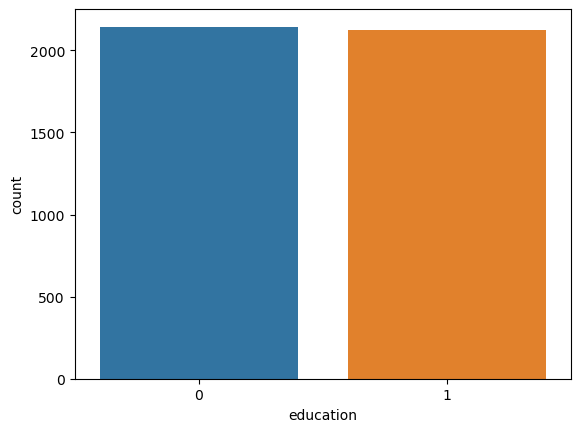

In [205]:
sns.countplot(data=loan,x='education');

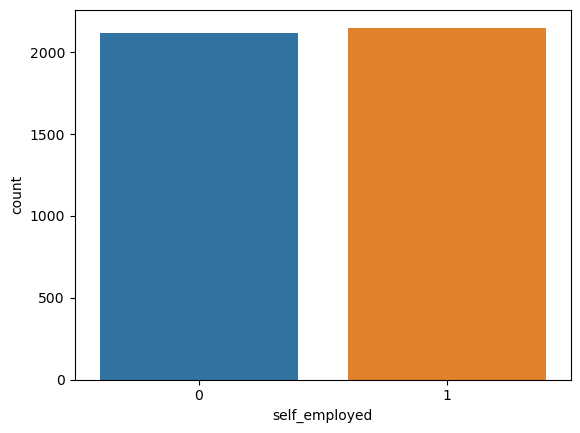

In [206]:
sns.countplot(data=loan,x='self_employed');

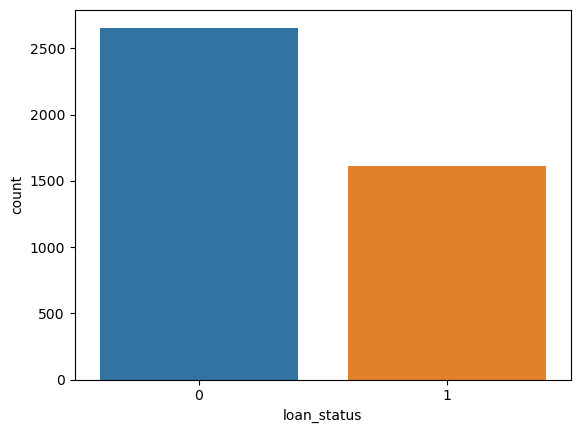

In [207]:
sns.countplot(data=loan,x='loan_status');

In [208]:
loan['loan_status'].value_counts()

loan_status
0    2656
1    1613
Name: count, dtype: int64

In [209]:
loan.corr().round(2)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
no_of_dependents,1.00,-0.00,0.00,0.01,-0.00,-0.02,-0.01,0.01,-0.00,0.00,0.01,0.02
education,-0.00,1.00,0.02,-0.01,-0.01,0.01,0.00,-0.01,0.01,-0.01,-0.01,0.00
self_employed,0.00,0.02,1.00,0.00,0.00,0.00,-0.00,0.01,-0.02,0.00,-0.00,-0.00
income_annum,0.01,-0.01,0.00,1.00,0.93,0.01,-0.02,0.64,0.64,0.93,0.85,0.02
loan_amount,-0.00,-0.01,0.00,0.93,1.00,0.01,-0.02,0.59,0.60,0.86,0.79,-0.02
loan_term,-0.02,0.01,0.00,0.01,0.01,1.00,0.01,0.01,-0.01,0.01,0.02,0.11
cibil_score,-0.01,0.00,-0.00,-0.02,-0.02,0.01,1.00,-0.02,-0.00,-0.03,-0.02,-0.77
residential_assets_value,0.01,-0.01,0.01,0.64,0.59,0.01,-0.02,1.00,0.41,0.59,0.53,0.01
commercial_assets_value,-0.00,0.01,-0.02,0.64,0.60,-0.01,-0.00,0.41,1.00,0.59,0.55,-0.01
luxury_assets_value,0.00,-0.01,0.00,0.93,0.86,0.01,-0.03,0.59,0.59,1.00,0.79,0.02


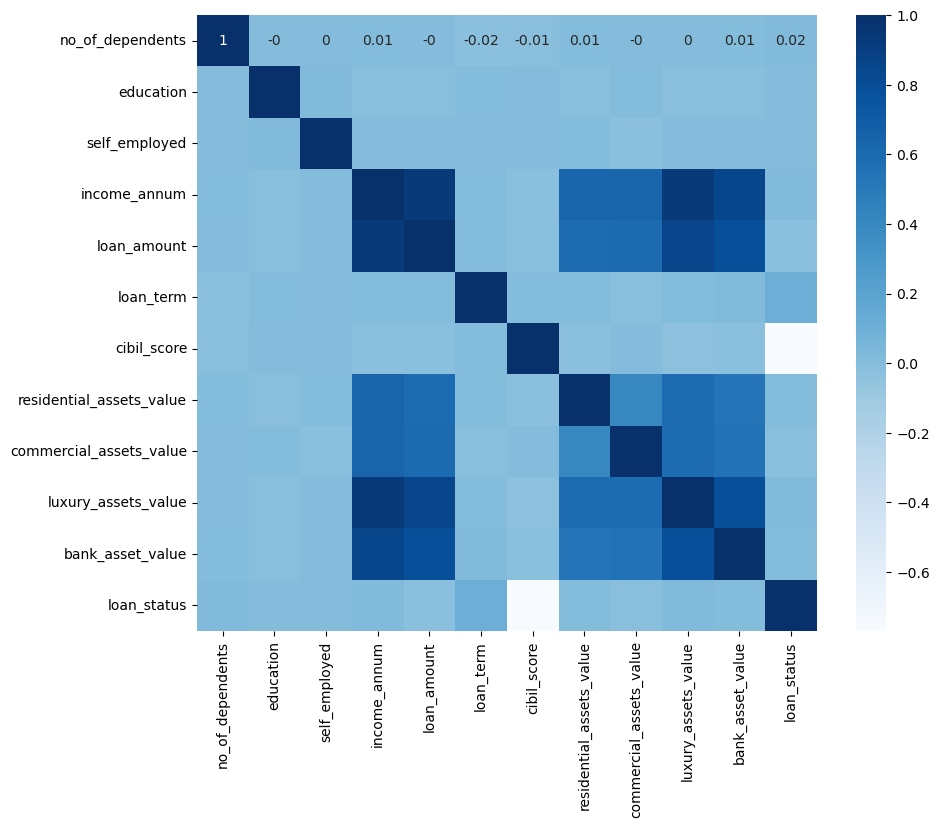

In [210]:
plt.figure(figsize=(10,8))
sns.heatmap(loan.corr().round(2),annot=True,cmap='Blues')
plt.show()

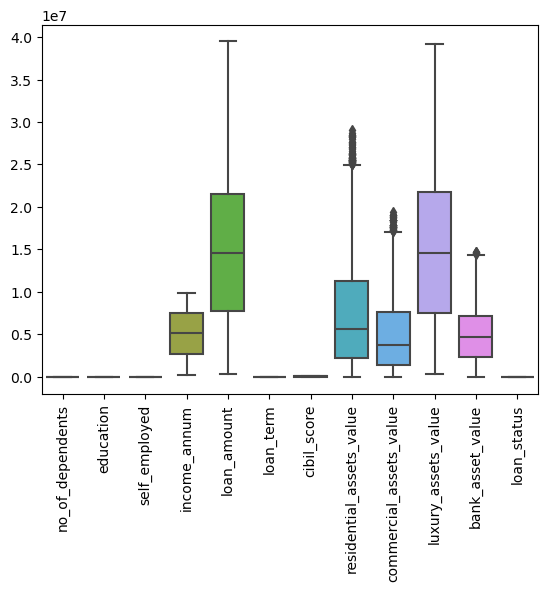

In [211]:
sns.boxplot(data=loan)
plt.xticks(rotation=90);

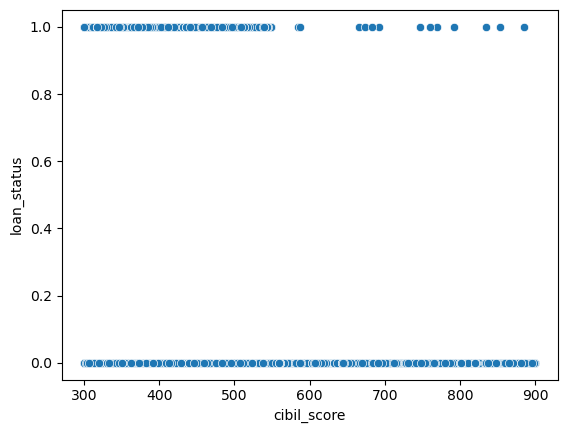

In [212]:
sns.scatterplot(x='cibil_score',y='loan_status',data=loan);

Test train split

In [213]:
x=loan.drop('loan_status',axis=1)
x

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [214]:
y=loan['loan_status']
y

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name: loan_status, Length: 4269, dtype: int32

In [215]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

LOGISTIC REGRESSION :

In [216]:
log = LogisticRegression()
log.fit(x_train,y_train)
log_pred = log.predict(x_test)

In [217]:
print(confusion_matrix(y_test,log_pred))
print(classification_report(y_test,log_pred))

[[518   1]
 [335   0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       519
           1       0.00      0.00      0.00       335

    accuracy                           0.61       854
   macro avg       0.30      0.50      0.38       854
weighted avg       0.37      0.61      0.46       854



RANDOM FOREST CLASSIFIER:

In [218]:
rf=RandomForestClassifier(random_state=1,n_jobs=-1)
rf_model=rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

In [219]:
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[513   6]
 [ 11 324]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       519
           1       0.98      0.97      0.97       335

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



IMPORTANT FEATURES :

In [220]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances}).sort_values('importance', ascending=False)
print(feature_importances)

                     feature  importance
6                cibil_score    0.825381
5                  loan_term    0.062236
4                loan_amount    0.026714
9        luxury_assets_value    0.016617
3               income_annum    0.016070
7   residential_assets_value    0.016061
8    commercial_assets_value    0.013799
10          bank_asset_value    0.012625
0           no_of_dependents    0.006184
2              self_employed    0.002241
1                  education    0.002071


FROM THE ABOVE ANALYSIS , WE FOUND THAT THE LOAN APPROVED PRIMARILY DEPENDS UPON CIBIL SCORE, LOAN TERM, LOAN AMOUNT OF A PERSON .
WE GOT 98% ACCURACY BY USING RANDOM FOREST CLASSIFIER (ENSEMBLE METHODS).